# Linear Regression

This notebook follow the class of ML. 

Step 1, import the libraries that we'll need. 

In [51]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

Import the libraries related for plotting the data information.

In [52]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15

y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [53]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

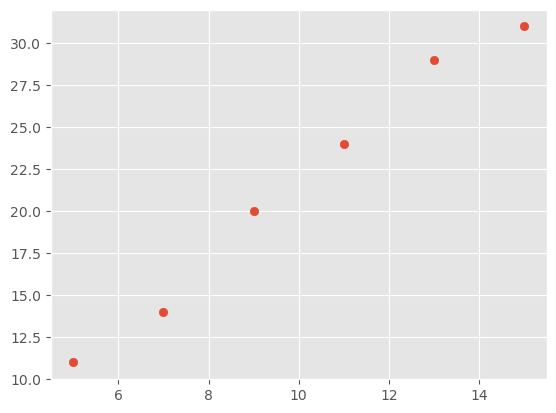

In [54]:
# Let's plot the data to see if a linear model is a good fit
plt.scatter(X, y)
plt.show()

In [55]:
# Checking the correlation coefficient
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

## Data Structure: let's look at X and y in more detail

In [56]:
y.shape

(6,)

In [57]:
y.ndim

1

y is clearly a 1d array

In [58]:
X.shape

(6,)

In [59]:
X.ndim

1

X is also a 1d array, so it's not good, as it needs to be a 2d array

In [60]:
X

array([ 5,  7,  9, 11, 13, 15])

As it's written as one row, but it really need 6 rows with one entry in each row, the array needs ti be reshape.

In [61]:
X = X.reshape(-1, 1)

X.shape

(6, 1)

In [62]:
X.ndim

2

let's look at it

In [63]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

Now there are 6 rows.

## Section 3, build the model

In [64]:
# Importing the LinearRegression model from sklearn

from sklearn.linear_model import LinearRegression

In [65]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [66]:
# create the model with an empty constructor 
model = LinearRegression()

Now "fit" the model using X and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [67]:
model.fit(X, y)

LinearRegression()

## Section 4 Inferences

In [68]:
model.coef_

array([2.12857143])

In [69]:
model.intercept_

0.2142857142857153

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [70]:
w0 = model.intercept_
w1 = model.coef_[0]

In [71]:
predictions = w0 + np.dot(w1, X).reshape(1, -1)

In [72]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in.predict

In [73]:
pred = model.predict(X)

pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [74]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

they are the same.

## Section 5 Evaluation

In [75]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score as r2

# from sklearn.metrics import root_mean_squared_error as rms

In [76]:
mse(y,pred)

0.723809523809522

In [77]:
r2(y,pred)

0.9864918906909576

In [78]:
# rms(y,pred)

In [79]:
rmse = np.sqrt(mse(y,pred))

rmse

0.8507699593953244

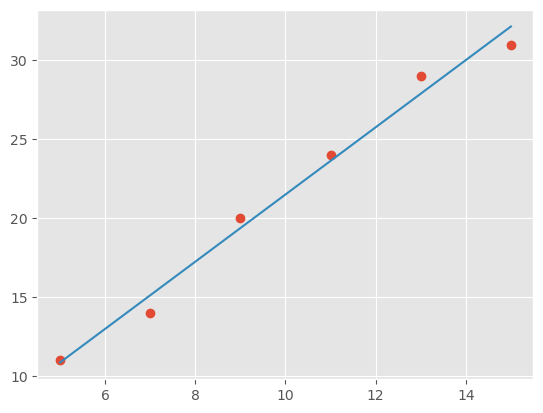

In [80]:
plt.plot(X,y,'o')
plt.plot(X,pred,)
plt.show()

it shows the line of best fit

In [81]:
model.score(X,y)

0.9864918906909576

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [82]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

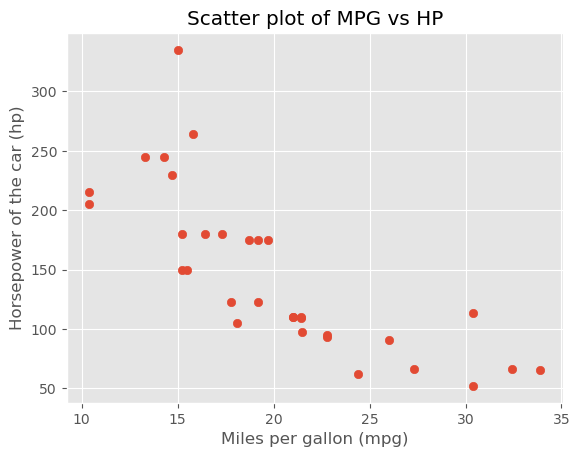

In [106]:
# I choose the variable "mpg" as the target variable (y) and "wt" as the feature variable (X).
# I chooded these variables because I believe that the number of cylinders and the weight of the car have a significant impact on its fuel efficiency (mpg).

X = dfcars[['mpg']]  # Feature variable: horsepower of the car
y = dfcars['hp']   # Target variable: miles per gallon

# Plotting the data to visualize the relationship between the variables
plt.scatter(X, y)
plt.xlabel("Miles per gallon (mpg)")
plt.ylabel("Horsepower of the car (hp)")
plt.title("Scatter plot of MPG vs HP")
plt.show()



In [107]:
# looking at the correlation between the variables
correlation = dfcars[['mpg', 'hp']].corr()
print(correlation)

          mpg        hp
mpg  1.000000 -0.776168
hp  -0.776168  1.000000


In [110]:
from sklearn.linear_model import LinearRegression


X = dfcars[['mpg']]  # Feature variable: miles per gallon
y = dfcars['hp']  # Target variable: horsepower of the car
model = LinearRegression()
model.fit(X, y)

LinearRegression()

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

In [102]:
#your code here
#define  predictor and response for set

model.fit(X, y)
model.coef_
model.intercept_


324.08231421252054

In [111]:
#your code here
# create linear regression object with sklearn

model = LinearRegression()
model.fit(X, y)


#your code here
# train the model and make predictions
y_pred = model.predict(X)

#your code here
#print out coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-8.82973099]
Intercept: 324.08231421252054


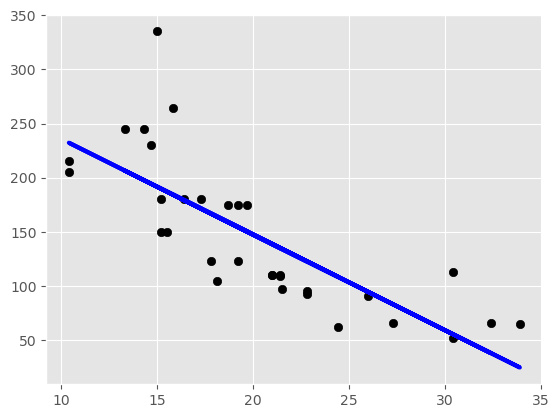

In [112]:
# your code here
# Plot outputs

plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

# Diabetes Dataset - Multiple linear regression 

Fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors.

In [86]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


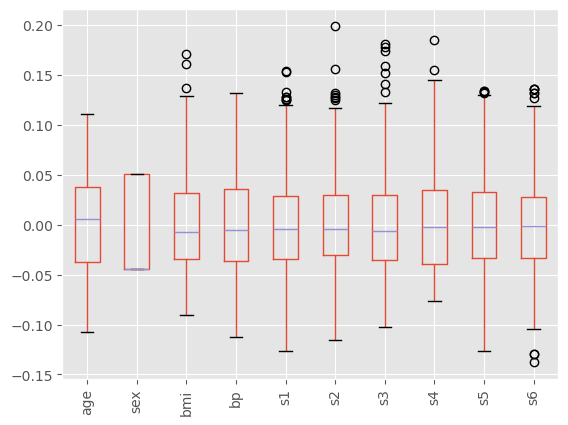

In [87]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [88]:
X = data
y = diabetes.target
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [89]:
r_squared = lr.score(X, y)
r_squared

0.5177484222203498

do a slightly different r2

In [90]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853231

In [91]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [92]:
lr.intercept_

152.13348416289597

Text(0, 0.5, 'Coefficient')

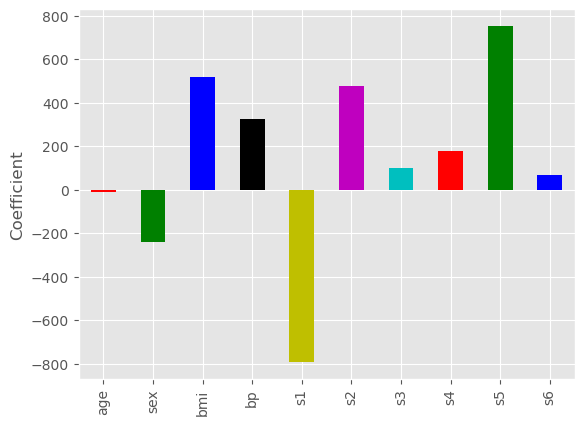

In [93]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')